In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None


In [2]:
listing = pd.read_csv('redfin_2021-12-13-11-04-05.csv')

In [3]:
listing.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,1708 Overlook Dr,Silver Spring,MD,20903,530000,3.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/MD/Silver-Spring/1708-O...,BRIGHT MLS,MDMC2024102,N,Y,39.026107,-76.976930
1,MLS Listing,NaN,Single Family Residential,12 Baughman Ct,Silver Spring,MD,20906,925000,6.0,5.0,...,Active,NaN,NaN,https://www.redfin.com/MD/Silver-Spring/12-Bau...,BRIGHT MLS,MDMC2025222,N,Y,39.104325,-77.043420
2,MLS Listing,NaN,Townhouse,13115 Brahms Ter,Silver Spring,MD,20904,410000,4.0,3.5,...,Active,NaN,NaN,https://www.redfin.com/MD/Silver-Spring/13115-...,BRIGHT MLS,MDMC2025394,N,Y,39.072148,-76.952694
3,MLS Listing,NaN,Townhouse,142 Finale Ter,Silver Spring,MD,20901,445000,3.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/MD/Silver-Spring/142-Fi...,BRIGHT MLS,MDMC2025234,N,Y,39.042930,-77.005955
4,MLS Listing,NaN,Single Family Residential,4106 Weller Rd,Silver Spring,MD,20906,549900,6.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/MD/Silver-Spring/4106-W...,BRIGHT MLS,MDMC2026042,N,Y,39.061788,-77.081786


In [4]:
listing.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

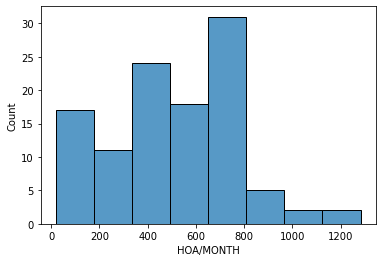

In [5]:
sns.histplot(listing['HOA/MONTH'])
plt.show()

In [6]:
# plot houses coordinates over Silver Spring map
silverspring = plt.imread('silverspring_map.png')


In [7]:
BBox = ((listing.LONGITUDE.min(),   listing.LONGITUDE.max(),      
         listing.LATITUDE.min(), listing.LATITUDE.max()))

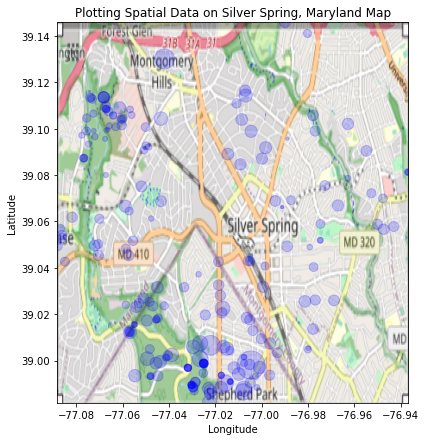

In [8]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(listing.LONGITUDE, listing.LATITUDE, zorder=1, alpha= 0.2, c='b', s=listing['PRICE']/5000)
ax.set_title('Plotting Spatial Data on Silver Spring, Maryland Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(silverspring, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

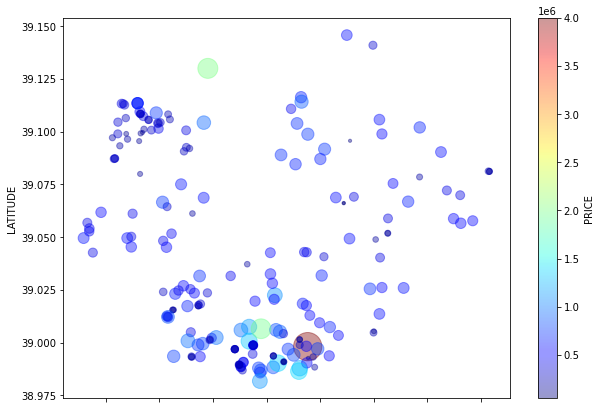

In [9]:
listing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    s=listing["PRICE"]/5000,  figsize=(10,7),cmap=plt.get_cmap("jet"), 
             colorbar=True,  c="PRICE")
plt.show()

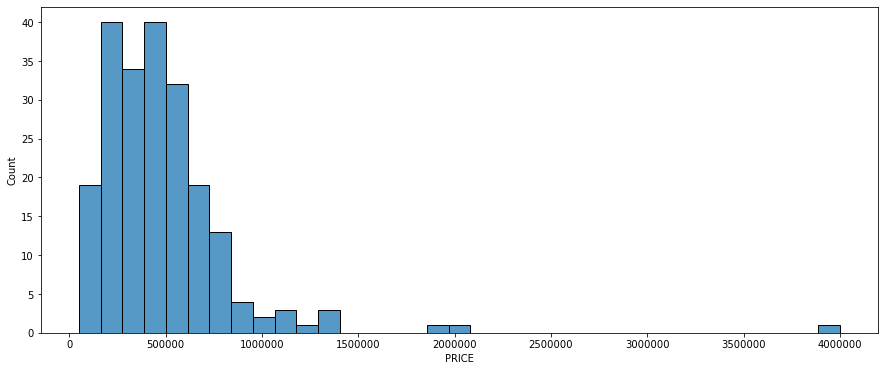

In [10]:
plt.figure(figsize =(15,6))
sns.histplot(data=listing, x="PRICE")
plt.ticklabel_format(useOffset=False,style='plain')

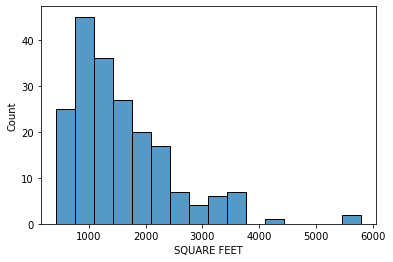

In [11]:
sns.histplot(data=listing, x="SQUARE FEET")
plt.show()

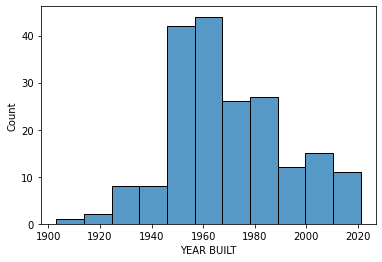

In [12]:
sns.histplot(data=listing, x="YEAR BUILT")
plt.show()

<AxesSubplot:xlabel='BATHS', ylabel='count'>

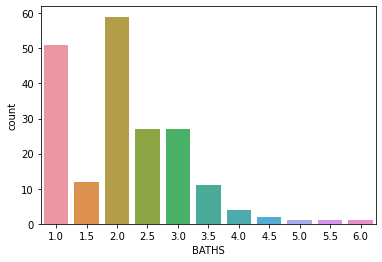

In [13]:
sns.countplot(x="BATHS", data=listing)

<AxesSubplot:xlabel='BEDS', ylabel='count'>

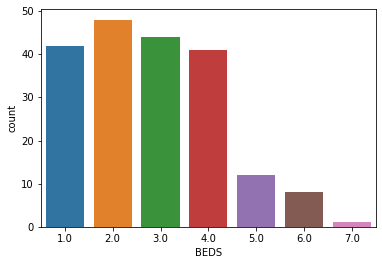

In [14]:
sns.countplot(x="BEDS", data=listing)

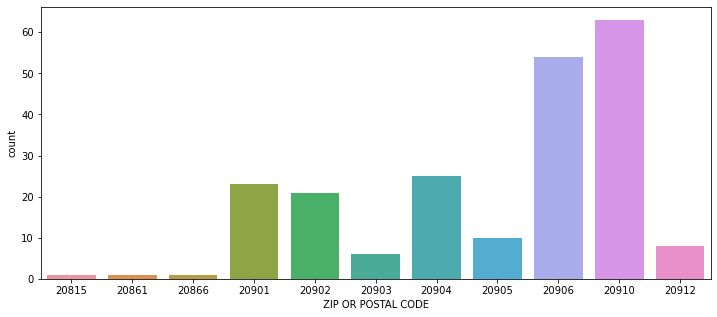

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x="ZIP OR POSTAL CODE", data=listing)
plt.show()

<AxesSubplot:xlabel='PROPERTY TYPE', ylabel='count'>

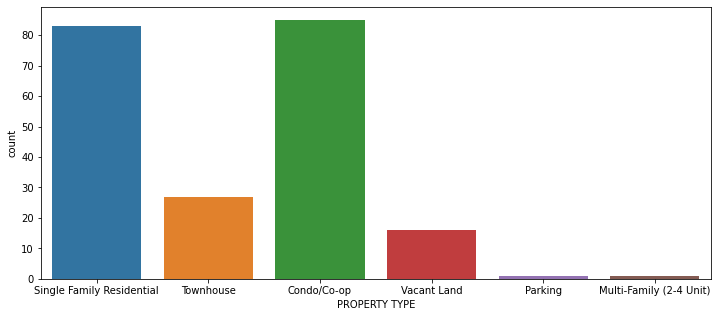

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x="PROPERTY TYPE", data=listing)

Text(0, 0.5, 'Count')

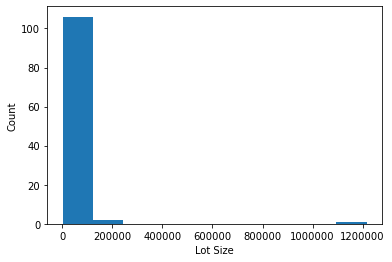

In [17]:
plt.hist(data=listing, x="LOT SIZE")
plt.ticklabel_format(useOffset=False,style='plain')
plt.xlabel('Lot Size')
plt.ylabel('Count')

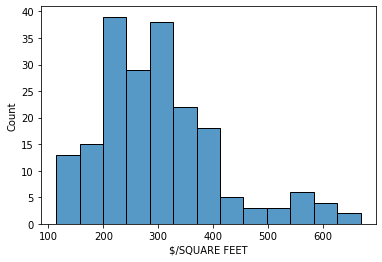

In [18]:
sns.histplot(data=listing, x="$/SQUARE FEET")
plt.show()

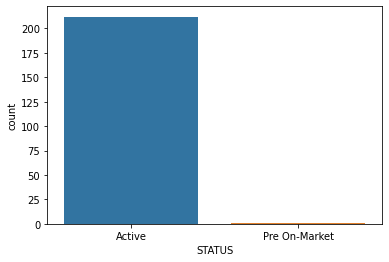

In [19]:
sns.countplot(x="STATUS", data=listing)
plt.show()

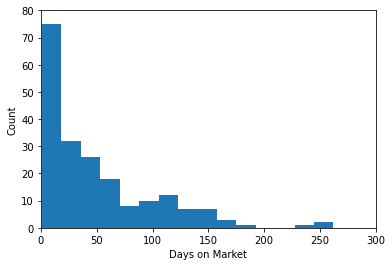

In [20]:
df = listing['DAYS ON MARKET'].dropna().astype(int)
plt.xlim(0,300)
plt.ylim(0,80)
plt.hist(df, bins=30)
plt.xlabel('Days on Market')
plt.ylabel('Count')
plt.show()